In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

The dataset contain 35,685 examples of 48x48 pixel gray scale images of faces divided into train and test dataset. Images are categorized based on the emotion shown in the facial expressions (happiness, neutral, sadness, anger, surprise, disgust, fear).

In [6]:
train_dir = "./train" 
test_dir = "./test"   

In [7]:
img_size=48

In [8]:
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [9]:
!pwd

/home/romagnolilab/Downloads/CSC4444


In [10]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [11]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

# Model evaluation

In [12]:
from sklearn.metrics import confusion_matrix , classification_report 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [13]:
#load the saved model
loaded_model = tf.keras.models.load_model('Emotion_detect')
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

2022-12-02 20:47:55.433074: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-12-02 20:47:55.433119: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (che-rm2125-lin01): /proc/driver/nvidia/version does not exist
2022-12-02 20:47:55.433700: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
loaded_model.evaluate(validation_generator)
preds = loaded_model.predict(validation_generator)
y_preds = np.argmax(preds , axis = 1 )
y_test = np.array(validation_generator.labels)

23/23 [==============================] - 4s 171ms/step


In [17]:
class_labels  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]

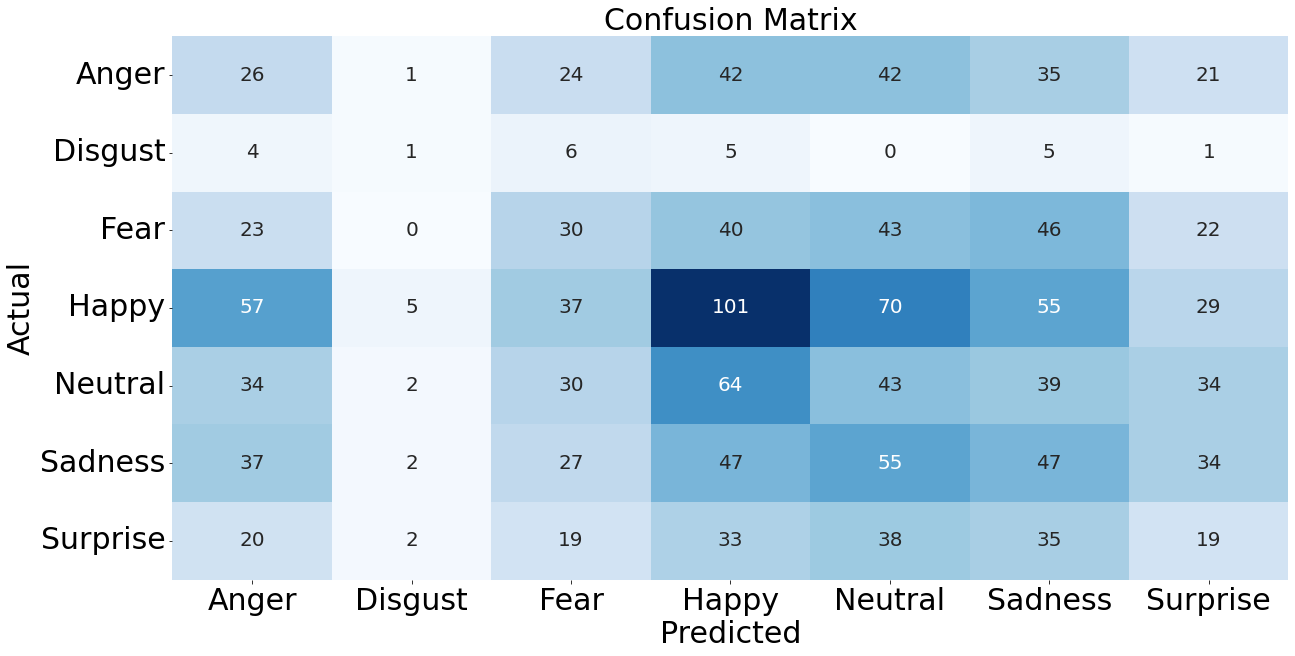

In [18]:
plt.rcParams.update({'font.size': 30})
cm_data = confusion_matrix(y_test , y_preds)
cm = pd.DataFrame(cm_data, columns = class_labels, index = class_labels)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (20,10))
plt.title('Confusion Matrix', fontsize = 30)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 20}, fmt='g')

In [19]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.13      0.14      0.13       191
           1       0.08      0.05      0.06        22
           2       0.17      0.15      0.16       204
           3       0.30      0.29      0.29       354
           4       0.15      0.17      0.16       246
           5       0.18      0.19      0.18       249
           6       0.12      0.11      0.12       166

    accuracy                           0.19      1432
   macro avg       0.16      0.16      0.16      1432
weighted avg       0.19      0.19      0.19      1432



# Implement training on the test Data

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.preprocessing import image

In [24]:
def apply_model(img):
    img = np.array(img)
    plt.imshow(img)
    img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
    img = img.reshape(1,48,48,1)
    result = loaded_model.predict(img)
    result = list(result[0])
    img_index = result.index(max(result))
    print(label_dict[img_index])
    plt.show()

In [25]:
# Test model - 01
img = image.load_img("./test/fearful/im150.png", target_size = (48,48),color_mode = "grayscale")

1/1 [==============================] - 0s 172ms/step
Fear


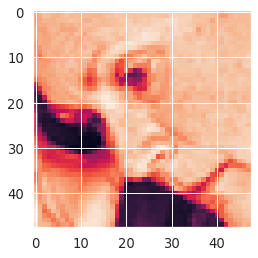

In [26]:
# use model
apply_model(img)

1/1 [==============================] - 0s 26ms/step
Surprise


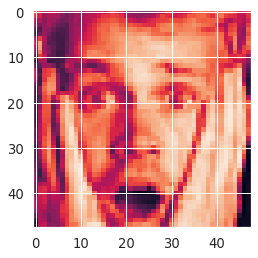

In [27]:
# Test model - 02
img02 = image.load_img("./test/surprised/im4.png", target_size = (48,48),color_mode = "grayscale")
# use model
apply_model(img02)

1/1 [==============================] - 0s 28ms/step
Angry


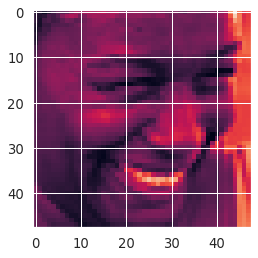

In [28]:
# Test model - 03
img05 = image.load_img("./test/happy/im5.png", target_size = (48,48),color_mode = "grayscale")
# use model
apply_model(img05)

If found useful,Please Upvote!!